In [1]:
import pandas as pd
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
df = pd.read_pickle('../data/matrix_features.pkl')
print(len(df))
total_hours = len(df['id_hour'].unique())
print(len(df) / total_hours)
# create training, test, validation set
print('Creating training, validation, test set')
train_size = int(total_hours*0.7)
valid_size = int(total_hours*0.15)
test_size = int(total_hours*0.15)
df_train = df[df['id_hour'] < train_size]
df_valid = df[(df['id_hour'] >= train_size) & (df['id_hour'] < (train_size+valid_size))]
df_test = df[(df['id_hour'] >= (train_size+valid_size))]
X_train, y_train = df_train.drop(['id_hour', 'net_rate'], axis=1), df_train['net_rate']
X_valid, y_valid = df_valid.drop(['id_hour', 'net_rate'], axis=1), df_valid['net_rate']
X_test, y_test = df_test.drop(['id_hour', 'net_rate'], axis=1), df_test['net_rate']
del df_train
del df_valid
del df_test
del df

610032
71.0
Creating training, validation, test set


/home/ds-vttek/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/ds-vttek/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:1.63967	validation_1-rmse:1.69392
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.57873	validation_1-rmse:1.63762
[2]	validation_0-rmse:1.52047	validation_1-rmse:1.58569
[3]	validation_0-rmse:1.48219	validation_1-rmse:1.54796
[4]	validation_0-rmse:1.43377	validation_1-rmse:1.51046
[5]	validation_0-rmse:1.40255	validation_1-rmse:1.47708
[6]	validation_0-rmse:1.37545	validation_1-rmse:1.45054
[7]	validation_0-rmse:1.35132	validation_1-rmse:1.42363
[8]	validation_0-rmse:1.33105	validation_1-rmse:1.40046
[9]	validation_0-rmse:1.29674	validation_1-rmse:1.38323
[10]	validation_0-rmse:1.27885	validation_1-rmse:1.36414
[11]	validation_0-rmse:1.26271	validation_1-rmse:1.3494
[12]	validation_0-rmse:1.24782	validation_1-rmse:1.336
[13]	validation_0-rmse:1.23464	validation_1-rmse:1.32448
[14]	validation_0-rmse:1.22337	validation_1-rmse:1.31368

[142]	validation_0-rmse:1.00288	validation_1-rmse:1.18413
[143]	validation_0-rmse:1.00211	validation_1-rmse:1.18383
[144]	validation_0-rmse:1.00142	validation_1-rmse:1.18367
[145]	validation_0-rmse:1.00039	validation_1-rmse:1.18324
[146]	validation_0-rmse:0.999876	validation_1-rmse:1.18309
[147]	validation_0-rmse:0.99931	validation_1-rmse:1.18305
[148]	validation_0-rmse:0.998874	validation_1-rmse:1.18277
[149]	validation_0-rmse:0.997953	validation_1-rmse:1.18286
[150]	validation_0-rmse:0.997784	validation_1-rmse:1.1829
[151]	validation_0-rmse:0.997184	validation_1-rmse:1.18308
[152]	validation_0-rmse:0.996963	validation_1-rmse:1.18313
[153]	validation_0-rmse:0.996579	validation_1-rmse:1.18323
[154]	validation_0-rmse:0.995777	validation_1-rmse:1.1832
[155]	validation_0-rmse:0.995306	validation_1-rmse:1.18307
[156]	validation_0-rmse:0.995105	validation_1-rmse:1.18308
[157]	validation_0-rmse:0.994918	validation_1-rmse:1.1832
[158]	validation_0-rmse:0.994371	validation_1-rmse:1.18311
Stopp

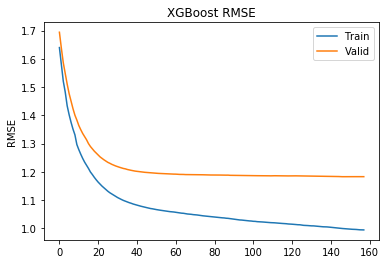

In [3]:
t1 = time()
model = XGBRegressor(max_depth=7, n_estimators=500) #, min_child_weight=100, colsample_bytree=0.8, subsample=0.8, eta=0.3, seed=42)
model.fit(X_train, y_train, eval_metric="rmse", 
          eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=True, early_stopping_rounds = 10)
t2 = time()
print('Total of training time: ', t2-t1)
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Valid')
plt.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [4]:
y_pred = model.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  1.2037425396570232


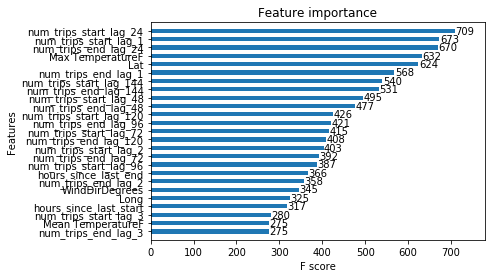

In [5]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1,figsize=(10,10))
plot_importance(model, max_num_features=25, grid=False, height=0.5, importance_type='weight')

In [6]:
from sklearn.neural_network import MLPRegressor


model = MLPRegressor(hidden_layer_sizes=(128, 64, 64,32), learning_rate_init=0.01, verbose=True, max_iter=200)
concat_X_train = X_train.append(X_valid)
concat_y_train = y_train.append(y_valid)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)
print('RMSE Neural Network: ', np.sqrt(mean_squared_error(y_test.values, y_pred)))

Iteration 1, loss = 2.41878332
Iteration 2, loss = 0.78417873
Iteration 3, loss = 0.76495343
Iteration 4, loss = 0.76550852
Iteration 5, loss = 0.75561234
Iteration 6, loss = 0.74535258
Iteration 7, loss = 0.73971033
Iteration 8, loss = 0.74179790
Iteration 9, loss = 1.04021632
Iteration 10, loss = 0.83988162
Iteration 11, loss = 0.73809858
Iteration 12, loss = 0.72484915
Iteration 13, loss = 0.72887120
Iteration 14, loss = 0.72816621
Iteration 15, loss = 0.75394014
Iteration 16, loss = 0.72410719
Iteration 17, loss = 0.73266557
Iteration 18, loss = 0.72567261
Iteration 19, loss = 0.72251789
Iteration 20, loss = 0.71769765
Iteration 21, loss = 0.70429677
Iteration 22, loss = 0.71470585
Iteration 23, loss = 0.70656667
Iteration 24, loss = 0.71546626
Iteration 25, loss = 0.70723777
Iteration 26, loss = 0.70799436
Iteration 27, loss = 0.70284063
Iteration 28, loss = 0.70502989
Iteration 29, loss = 0.70683873
Iteration 30, loss = 0.70467267
Iteration 31, loss = 0.70260470
Iteration 32, los